In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# def make_system(n, x_0, x_n, y_0, y_n):
    
#     h = (x_n - x_0)/n
    
#     a = []
#     b = []
#     c = []
#     d = []

#     a.append(0)
#     b.append(1)
#     c.append(0)

#     for i in range(1, n):
#         a.append(1)
#         b.append(-2)
#         c.append(1)
    
#     a.append(0)
#     b.append(1)
#     c.append(0)
    
#     d = []
#     x = []

#     d.append(y_0)
#     x.append(x_0)

#     for i in range(1,n):
#         x_i = x_0 + h*i
#         d.append((h ** 2) * f(x_i))
#         x.append(x_i)

#     d.append(y_n)
#     x.append(x_n)
    
#     A = [a, b, c]
    
#     return A, d, x

In [4]:
def TridiagMatrixAlg(a, b, c, d, N):
    y = np.array([0.] * N)
 
    for i in range(1, N):
        xi = a[i] / b[i-1]
        a[i] = 0
        b[i] -= xi * c[i-1]
        d[i] -= xi * d[i-1]

    y[N-1] = d[N-1] / b[N-1]    
    
    for i in range(N-2, -1, -1):
        y[i] = 1 / b[i] * (d[i] - c[i] * y[i+1])    
    
    return y

In [5]:
U = lambda x: x**2 / 2

In [6]:
def A(x, N):
    h = x[1] - x[0]
    a = np.array([-1. / (2 * h**2)] * N)
    a[0] = 0
    b = 1. / h ** 2 + U(x)
    c = np.array([-1./(2 * h**2)] * N)
    c[N-1] = 0

    return a, b, c

In [7]:
def Orthogonalization(psi_next, psi_prevs):
    for psi in psi_prevs:
        psi_next -= psi * (np.inner(psi_next, psi)) / np.linalg.norm(psi)

In [8]:
def InverseIterations(psi0, x, N, iteration, levels):
    E = []
    psi = []
    a, b, c = A(x, N)

    for m in range(0, levels):
        psi_next = psi0.copy()
        Orthogonalization(psi_next, psi)
        currError = 1e-4
#         while np.abs(currError - 1e-5) > 0:
#             psi_prev = psi_next
#             psi_next = TridiagMatrixAlg(np.copy(a), np.copy(b), np.copy(c), np.copy(psi_next), N)
#             Orthogonalization(psi_next, psi)
        for k in range(0, iteration):
            psi_prev = psi_next
            psi_next = TridiagMatrixAlg(np.copy(a), np.copy(b), np.copy(c), np.copy(psi_next), N)
            Orthogonalization(psi_next, psi)/
    
        E0 = np.linalg.norm(psi_prev) / np.linalg.norm(psi_next)
        E.append(E0)
        psi_next /= np.linalg.norm(psi_next)        
        psi.append(psi_next)
    
    return E, psi

E0: 0.4999874746486524


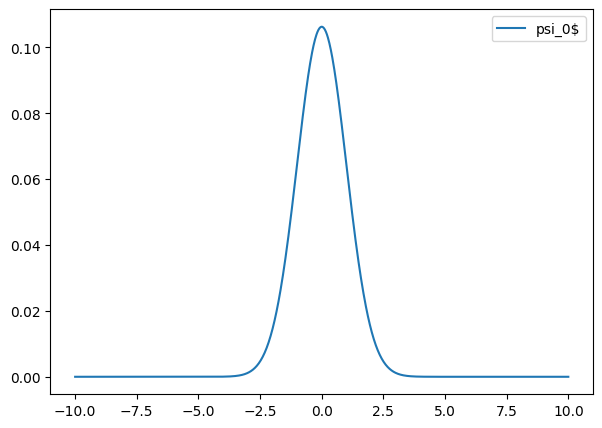

In [12]:
N = 1000
iteration = 50
(x1, x2) = (-10, 10)
levels = 3 
x = np.linspace(x1, x2, N)
y0 = np.linspace(1, 2, N)

E, psi = InverseIterations(y0, x, N, iteration, levels)

plt.figure(figsize=(7, 5), dpi=100)

# for i in range(0, levels):
print(str.format('E{}: {}', 0, E[0]))
plt.plot(x, psi[0], label = f'psi_{0}$')
plt.legend()
plt.show()